# EUROSTAT: Population on 1 January by age and sex (`demo_pjan`)


* The data itself is at https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/demo_pjan?format=TSV&compressed=true
* The (very) detailed metadata, including things like measure units are available as an HTML page at https://ec.europa.eu/eurostat/cache/metadata/en/demo_pop_esms.htm

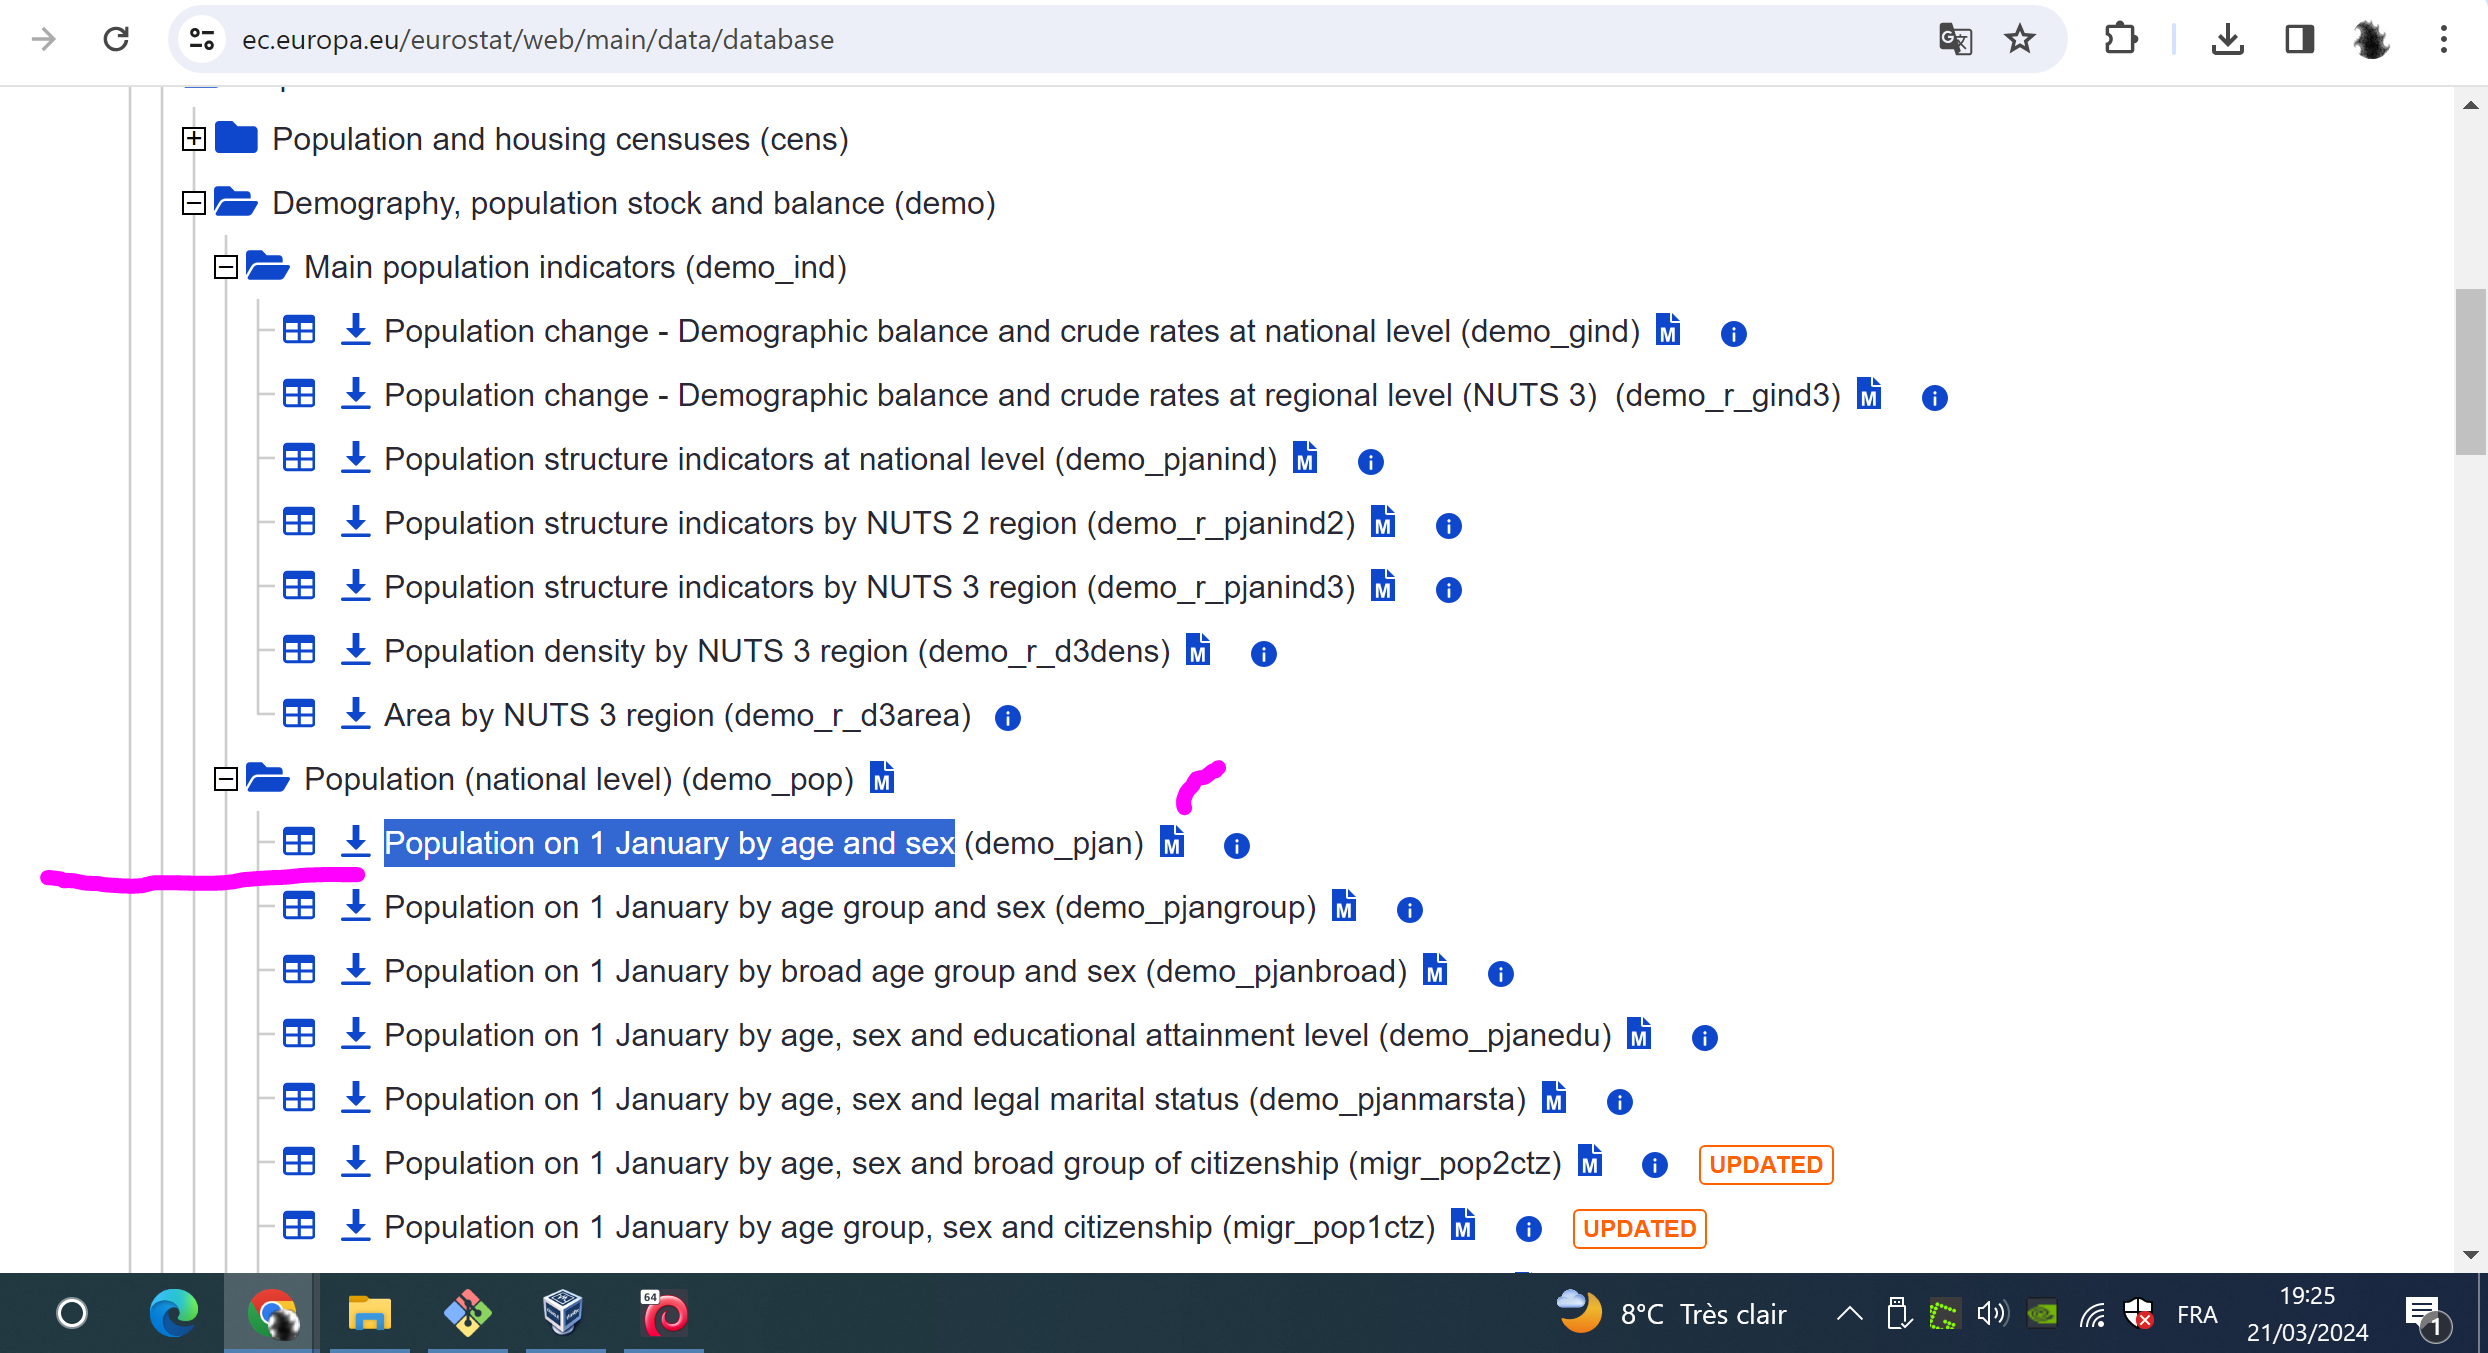

## External Dependencies

In [2]:
import pl from "npm:nodejs-polars";
import { json2csv } from 'npm:json-2-csv';

## Internal Dependencies

In [3]:
const tsv2arr = (tsv) => {
  const [headers, ...rows] = tsv .trim () .split ('\n') .map (r => r .split ('\t'))
  return rows .reduce ((a, r) => [
    ... a, 
    Object .assign (... (r .map (
      (x, i, _, c = x.trim()) => ({[headers [i].trim()]: isNaN(c) ? c : Number(c)})
    )))
  ], [])
}

## Download The Data

We download the dataset coming from https://ec.europa.eu/eurostat/web/main/data/database

For all those datasets,onlyone format is available, it seems: the `TSV` format

In [7]:
const eurostat_baseUrl: String = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/"

In [8]:
const desiredFormat: String = "/?format=TSV"
const response_Population_on_1_January_by_age_and_sex_demo_pjan: Promise = await fetch( eurostat_baseUrl +"demo_pjan"+ desiredFormat)
const Population_on_1_January_by_age_and_sex_demo_pjan: String = await response_Population_on_1_January_by_age_and_sex_demo_pjan.text();
// console.log(Population_on_1_January_by_age_and_sex_demo_pjan);

In [9]:
/**
 * we then write the string data to a file, because its much too big to be plaayed with inside a single variable in RAM
 * After that, we willlook for ways to split the TSV data into multiple files, that can be
 * processed independently, to be turned into JSON for example ?
 **/
// await Deno.writeTextFile("Population_on_1_January_by_age_and_sex_demo_pjan.tsv", Population_on_1_January_by_age_and_sex_demo_pjan);

_Now we convert the downloadedTSV data, to JSON Data, using our `tsv2arr` function_

In [11]:
const Population_on_1_January_by_age_and_sex_demo_pjan_as_json = { array: tsv2arr(Population_on_1_January_by_age_and_sex_demo_pjan) }
// console.log (`MyResultingJSON`, MyResultingJSON) //just  if you want to check,theoutput if ofcourse extremely long

_Then we convert the JSON data, to CSV Data, using the `json-2-csv` `npm` package_

In [12]:
const Population_on_1_January_by_age_and_sex_demo_pjan_as_csv = await json2csv(Population_on_1_January_by_age_and_sex_demo_pjan_as_json.array, {});

_Then we clean the `CSV` data from any quote character: we remove any occurrence of the `"` character from the `CSV` data_

In [14]:
const Population_on_1_January_by_age_and_sex_demo_pjan_as_csv_cleaned = Population_on_1_January_by_age_and_sex_demo_pjan_as_csv.replace(/"/g, "");

_Finally, we instantiate  our polars Dataframe, from the cleaned `CSV` data_

In [15]:
const df_Population_on_1_January_by_age_and_sex_demo_pjan = pl.readCSV(Population_on_1_January_by_age_and_sex_demo_pjan_as_csv_cleaned, { sep: "," });
df_Population_on_1_January_by_age_and_sex_demo_pjan

1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,freq,unit,age,sex,geo\TIME_PERIOD
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,20898,22148,22814,23813,24171,25542,27572,28864,30406,30228,30200,30627,31025,31384,31538,31576,31915,32354,34738,36790,37575,38705,39622,40303,40296,38252,38252,37408,:,:,:,:,:,37388,:,:,:,:,A,NR,TOTAL,F,AD
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,1526762,1535822,1532563,1526180,1520481,1512745,1503969,1492439,1480358,1468935,1459025,1451691,1444234,1437193,1430827,1424597,1417141,1423050,1431715,1432833,1425342,1419759,1406532,1394864,A,NR,TOTAL,F,AL
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,1681200,1672200,1670500,1666700,1665500,1665200,1665123,1665554,1667529,1669711,1673656,1679066,1684000,:,:,1571450,1569535,1567380,1564533,1563538,1562689,1565144,:,1571757,A,NR,TOTAL,F,AM
3757167,3773097,3794130,3814191,3836415,3857760,3876559,3899799,3922359,3932691,3944298,3953827,3972070,3990665,4006377,4003303,3992886,3992437,3994255,3985363,3981359,3983154,3993808,3981596,3976213,3975117,3972356,3970653,3967609,3971179,3989903,4014682,4052348,4089274,4107857,4112289,4116117,4120947,4122811,4126432,4133855,4139842,4156906,4170674,4189973,4216493,4239954,4252922,4265500,4278068,4285442,4296293,4309977,4328238,4352447,4384529,4427918,4460424,4483749,4501742,4522292,4535712,4553444,4619957,A,NR,TOTAL,F,AT
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,4097900,4126500,4152600,4179500,4207200,4243600,4284200,4327700,4371800,4538600,4542083,4594023,4651601,4707690,4763571,4817181,4870002,4918771,4960058,4999053,5039100,5065288,5081846,:,A,NR,TOTAL,F,AZ
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,1922585,:,:,1914073 e,1932756 e,1944715 e,1953478 e,1957082 e,1959692 e,1959752,1960449,1960361,1965986,1966011,1965701,1963655,:,:,:,:,:,:,:,:,:,:,:,A,NR,TOTAL,F,BA
4650891,4680332,4692881,4721909,4757001,4800240,4837409,4868944,4897385,4914120,4930511,4929078,4950716,4966920,4982187,4996106,5007918,5014837,5023356,5027912,5036166,5041979,5042116,5044878,5043503,5046163,5046712,5048517,5053913,5078668,5087683,5106290,5122765,5144847,5160407,5175903,5184262,5198446,5209592,5220034,5233071,5245395,5267437,5288959,5309245,5334527,5367561,5403126,5442557,5484429,5527684,5598920 b,5635601 b,5665118,5687048,5713206,5741853,5762455,5784371,5810693,5841215,5854293,5883978,5946649,A,NR,TOTAL,F,BE
3921043,3958593,3995543,4027480,4059726,4092536,4114958,4142041,4167280,4201969,4232840,4258313,4280930,4300053,4327798,4360061,4371919,4400441,4420915,4414767,4437268,4454938,4471841,4486480,4500629,4514813,4516402,4529072,4538312,4547303,4443535,4399271,4366016,4315730,4308125,4297452,4281347,4263435,4238235,4216300,4199715,4182045,4035676,4003292,3973019,3944453,3914757,3886094,3857635,3831264,3807808,3780505,3760457,3739479,3720732,3700183,3676607,3651881,3627625,3604338,3581836,3566833,3527626,3348207 b,A,NR,TOTAL,F,BG
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,5316268,5302718,5284465,5260849,5238879,5216991,5195244,5179429,5168358,5160289,5063266,5073034,5066857,5066314,5066943,5071671,5077522,5078185,5070289,5059429,:,:,:,:,A,NR,TOTAL,F,BY
2730400,2762955,2835874,2899101,2952274,2990789,3016742,3049556,3087845,3123083,3154705,3167724,3188388,3217328,3239574,3256587,3241162,3224164,3222954,3227625,3237338,3253278,3271087,3288680,3297473,3310638,3324453,3343502,3364945,3391052,3416313,3460226,3501103,3534043,3564707,3590651,3613512,3623725,3631222,3644848,3663736,3684357,3711304,3738824,3762609,3786406,3806626,3829380,3866480,3915181,3955240,3992708 b,4032409,4070536,4117540,4163786,42

### Now that we have our `Polars` Dataframe, let's query it a bit

#### Let's look at the data only for France

And understand the below table's data, according the informations :
* in https://ec.europa.eu/eurostat/cache/metadata/en/demo_pop_esms.htm
* and in https://ec.europa.eu/eurostat/cache/metadata/EN/demo_pop_esms_fr.htm

Questions to Pierre:

* `NR` means ...? ("Number of Resident"? "Number of Records"? "Nombre Recensé"?)
* If we understand well the data, the French total population on the `1st of January, 2023`, was exactly `68 172 977`, right ?
* Interesting: It seemsthat prior `1991`, there is no data about France, in EuroStat database. Right ?

In [17]:
df_Population_on_1_January_by_age_and_sex_demo_pjan.filter(pl.col('geo\\TIME_PERIOD').eq(pl.lit("FR"))).head(5000)

1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,freq,unit,age,sex,geo\TIME_PERIOD
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,29922325,30077312,30227980,30352301,30473942,30592988,30705968,30822400,30944296,31161369,31400989,31645924,31887488,32120553,32387008,32638535,32841832,33026963,33202247,33357092,33515819,33671600 b,33827685,34120851 b,34283895,34391005,34495464,34611994 p,34701745 p,34787547 p,34939338 p,35035940 p,35161186 p,A,NR,TOTAL,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,28391114,28527539,28657949,28752019,28841197,28929309,29020418,29112484,29214237,29383653,29578326,29778112,29976600,30171688,30385862,30591100,30803233,30980230,31147979,31301764,31462902,31605383 b,31772665,32045129 b,32174258,32247386,32314352,32414230 p,32475891 p,32532669 p,32717344 p,32835985 p,33011791 p,A,NR,TOTAL,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,58313439,58604851,58885929,59104320,59315139,59522297,59726386,59934884,60158533,60545022,60979315,61424036,61864088,62292241,62772870,63229635,63645065,64007193,64350226,64658856,64978721,65276983 b,65600350,66165980 b,66458153,66638391,66809816,67026224 p,67177636 p,67320216 p,67656682 p,67871925 p,68172977 p,A,NR,TOTAL,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,379681,377057,375902,368202,352686,353411,361497,363103,359063,367830,370754,386189,384351,378517,377515,379109,383754,392746,387836,391903,390382,394835,388302,387572 b,382086,381983,371069,364473 p,358819 p,351906 p,349534 p,340392 p,342543 p,A,NR,Y1,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,395626,396236,393558,385808,368294,369037,377715,381458,378233,385657,390107,405710,401576,396126,394139,397839,400697,411596,405378,408920,409290,414022,404414,407204 b,400698,394231,387714,379955 p,372191 p,367422 p,363312 p,355012 p,357565 p,A,NR,Y1,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,775307,773293,769460,754010,720980,722448,739212,744561,737296,753487,760861,791899,785927,774643,771654,776948,784451,804342,793214,800823,799672,808857,792716,794776 b,782784,776214,758783,744428 p,731010 p,719328 p,712846 p,695404 p,700108 p,A,NR,Y1,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,405415,403988,400147,376917,384120,387329,393039,388217,388238,390718,387910,385209,379957,365031,367651,377195,381416,377589,385520,389891,408872,402130,397009,399932 b,404680,406138,416385,410064 p,414436 p,412501 p,419932 p,410965 p,410451 p,A,NR,Y10,F,FR


_Now we just removethe lines where the total of anage range is presented: the lines where the `age` column value is `T`_

_We do that to show  how we can then compute again ourselves, the total population, for each age range, adding Males and Females, using a `groupBy` `polars` operator_

In [26]:
// df_Population_on_1_January_by_age_and_sex_demo_pjan.filter(pl.col('geo\\TIME_PERIOD').eq(pl.lit("FR"))).head(5000)
const df_demo_pjan_without_T = df_Population_on_1_January_by_age_and_sex_demo_pjan.filter(
    pl.col('geo\\TIME_PERIOD').eq(pl.lit("FR")).and(
        pl.col('age').neq(pl.lit("T"))
    )).head(5000)

df_demo_pjan_without_T;


1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,freq,unit,age,sex,geo\TIME_PERIOD
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,29922325,30077312,30227980,30352301,30473942,30592988,30705968,30822400,30944296,31161369,31400989,31645924,31887488,32120553,32387008,32638535,32841832,33026963,33202247,33357092,33515819,33671600 b,33827685,34120851 b,34283895,34391005,34495464,34611994 p,34701745 p,34787547 p,34939338 p,35035940 p,35161186 p,A,NR,TOTAL,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,28391114,28527539,28657949,28752019,28841197,28929309,29020418,29112484,29214237,29383653,29578326,29778112,29976600,30171688,30385862,30591100,30803233,30980230,31147979,31301764,31462902,31605383 b,31772665,32045129 b,32174258,32247386,32314352,32414230 p,32475891 p,32532669 p,32717344 p,32835985 p,33011791 p,A,NR,TOTAL,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,58313439,58604851,58885929,59104320,59315139,59522297,59726386,59934884,60158533,60545022,60979315,61424036,61864088,62292241,62772870,63229635,63645065,64007193,64350226,64658856,64978721,65276983 b,65600350,66165980 b,66458153,66638391,66809816,67026224 p,67177636 p,67320216 p,67656682 p,67871925 p,68172977 p,A,NR,TOTAL,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 p,0 p,0 p,0,0 p,0 p,A,NR,UNK,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,379681,377057,375902,368202,352686,353411,361497,363103,359063,367830,370754,386189,384351,378517,377515,379109,383754,392746,387836,391903,390382,394835,388302,387572 b,382086,381983,371069,364473 p,358819 p,351906 p,349534 p,340392 p,342543 p,A,NR,Y1,F,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,395626,396236,393558,385808,368294,369037,377715,381458,378233,385657,390107,405710,401576,396126,394139,397839,400697,411596,405378,408920,409290,414022,404414,407204 b,400698,394231,387714,379955 p,372191 p,367422 p,363312 p,355012 p,357565 p,A,NR,Y1,M,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,775307,773293,769460,754010,720980,722448,739212,744561,737296,753487,760861,791899,785927,774643,771654,776948,784451,804342,793214,800823,799672,808857,792716,794776 b,782784,776214,758783,744428 p,731010 p,719328 p,712846 p,695404 p,700108 p,A,NR,Y1,T,FR
:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,405415,403988,400147,376917,384120,387329,393039,388217,388238,390718,387910,385209,379957,365031,367651,377195,381416,377589,385520,389891,408872,402130,397009,399932 b,404680,406138,416385,410064 p,414436 p,412501 p,419932 p,410965 p,410451 p,A,NR,Y10,F,FR


_Okay now we are going to show for years 2023, 2022, and 2021, the total population by age ranges, in France_

In [28]:
/**
 * I assume that :
 *  > Y1 is population between age zero to 5
 *  > Y2 is population between age 5 to 10
 *  > etc...
 *
 **/

/**
 * For te below groupBy, the result is "null" far all, because in
 * many cases, there is a string ' p' that is there as an information about the data. So data should
 * be cleaned from those ' p', andturned intoactual integers, then the sum can be computed.
 **/
const df_French_Population_on_1_January_last3years_by_age_and_sex_per_year_ranges = df_demo_pjan_without_T.groupBy("age").agg(
    pl.col("2023").sum().alias("Population totale au 1er Janvier 2023"),
    pl.col("2022").sum().alias("Population totale au 1er Janvier 2022"),
    pl.col("2021").sum().alias("Population totale au 1er Janvier 2021")
).select(
    pl.col('*')
)
df_French_Population_on_1_January_last3years_by_age_and_sex_per_year_ranges
/*
const df_French_Population_on_1_January_last3years_by_age_and_sex_per_year_ranges = df_demo_pjan_without_T.groupBy("age").agg(
    pl.col("2023").sum().alias("Population totale au 1er Janvier 2023"),
    pl.col("2022").sum().alias("Population totale au 1er Janvier 2022"),
    pl.col("2021").sum().alias("Population totale au 1er Janvier 2021")
).select(
    pl.col('geo\\TIME_PERIOD').alias("Pays"), 
    pl.col("sex"), 
    pl.col("age").alias("Tranche d'âges"), 
    pl.col("unit").alias("Unité"), 
    pl.col("freq"), 
    pl.col("Population totale au 1er Janvier 2023"), 
    pl.col("Population totale au 1er Janvier 2022"), 
    pl.col("Population totale au 1er Janvier 2021")
)
df_French_Population_on_1_January_last3years_by_age_and_sex_per_year_ranges
*/
/*
const df_Population_on_1_January_by_age_and_sex_demo_pjan_per_year_ranges = df_demo_pjan_without_T.groupBy("age").agg(
    pl.col("2023").sum().alias("Population totale au 1er Janvier 2023"),
    pl.col("2022").sum().alias("Population totale au 1er Janvier 2022"),
    pl.col("2021").sum().alias("Population totale au 1er Janvier 2021")
).sort( {
    by: "age",
    descending: true
}).select(
    pl.col("annee").alias("Année"), 
    pl.col("Taux de Patients Min"), 
    pl.col("Taux de Patients moyen"), 
    pl.col("Taux de Patients médian"), 
    pl.col("Taux de Patients Max"), 
    pl.col("Nombre total annuel de patients")
)
basic_stats_per_year_df
*/

age,Population totale au 1er Janvier 2023,Population totale au 1er Janvier 2022,Population totale au 1er Janvier 2021
Y46,null,null,null
Y14,null,null,null
Y74,null,null,null
Y63,null,null,null
Y70,null,null,null
Y6,null,null,null
Y87,null,null,null
Y77,null,null,null
Y38,null,null,null
Y60,null,null,null
